In [ ]:
#tar -xvf  '/content/gdrive/MyDrive/EE544(Computer-Vision)/Colab Notebooks/data/imagenette2-320.tgz' -C '/content/gdrive/MyDrive/EE544(Computer-Vision)/Colab Notebooks/data/'

In [ ]:
!tree -d drive/MyDrive/'Colab Notebooks'/data/imagenette2-320/run

drive/MyDrive/Colab Notebooks/data/imagenette2-320/run
├── cathedral
├── golf_ball
├── test
│   ├── cathedral
│   └── golf_ball
├── train
│   ├── cathedral
│   └── golf_ball
└── validate
    ├── cathedral
    └── golf_ball

11 directories


In [ ]:
# Mount google drive and define locations of original, unmodified imagenette data
from google.colab import drive, files
import os

drive.mount("/content/drive", force_remount=True)
working_dir = "/content/drive/MyDrive/Colab Notebooks/"

imagenette_dir = os.path.join(working_dir, "data/imagenette2-320")
original_train_dir = os.path.join(imagenette_dir, "train")
original_test_dir = os.path.join(imagenette_dir, "val")


Mounted at /content/drive


In [ ]:
from pathlib import Path
from shutil import copyfile
from distutils.dir_util import copy_tree # import necessary to circumvent issues with using shutils.copytree in Python v3.6

# Create 2 class folders that will contain all instances of their respective class
# Create 3 directories for train validate and test data
def init_run():
    Path(run_dir+"/cathedral").mkdir(parents=True, exist_ok=True)
    Path(run_dir+"/golf_ball").mkdir(parents=True, exist_ok=True)

    Path(run_dir+"/train").mkdir(parents=True, exist_ok=True)
    Path(run_dir+"/train/cathedral").mkdir(parents=True, exist_ok=True)
    Path(run_dir+"/train/golf_ball").mkdir(parents=True, exist_ok=True)

    Path(run_dir+"/validate").mkdir(parents=True, exist_ok=True)
    Path(run_dir+"/validate/cathedral").mkdir(parents=True, exist_ok=True)
    Path(run_dir+"/validate/golf_ball").mkdir(parents=True, exist_ok=True)

    Path(run_dir+"/test").mkdir(parents=True, exist_ok=True)
    Path(run_dir+"/test/cathedral").mkdir(parents=True, exist_ok=True)
    Path(run_dir+"/test/golf_ball").mkdir(parents=True, exist_ok=True)

# Only copy the classes to be used in the model to the run directory
def drop_classes():
    try:
        # Copy all images in train/n03028079 and val/n03028079 to cathedral dir
        copy_tree(original_train_dir+"/n03028079", run_dir+"/cathedral")
        copy_tree(original_test_dir+"/n03028079", run_dir+"/cathedral")

        # Copy all images in train/n03445777 and val/n03445777 to golf_ball dir
        copy_tree(original_train_dir+"/n03445777", run_dir+"/golf_ball")
        copy_tree(original_test_dir+"/n03445777", run_dir+"/golf_ball")
    
    except Exception as e:
        print(e)

# Get a portion of data from each of the classes and put it the the appropriate dir
# Prior testing shows that the classes are perfectly balanced meaning that we can allocate the same number of each class to train validate and test dirs
def split_data():
    train_split = 945
    validate_split = train_split + 202
    test_split = validate_split + 203
    c1_samples = os.listdir(run_dir+"/cathedral")
    c2_samples = os.listdir(run_dir+"/golf_ball")
    c1_n_samples = len(c1_samples)
    c2_n_samples = len(c2_samples)
    print("{} class 1 samples".format(c1_samples))
    print("{} class 2 samples".format(c2_samples))

    for i in range(0, train_split):
        copyfile(run_dir+"/cathedral/"+c1_samples[i], run_dir+"/train/cathedral/"+c1_samples[i])
        copyfile(run_dir+"/golf_ball/"+c2_samples[i], run_dir+"/train/golf_ball/"+c2_samples[i])

    for i in range(train_split, validate_split):
        copyfile(run_dir+"/cathedral/"+c1_samples[i], run_dir+"/validate/cathedral/"+c1_samples[i])
        copyfile(run_dir+"/golf_ball/"+c2_samples[i], run_dir+"/validate/golf_ball/"+c2_samples[i])

    for i in range(validate_split, test_split):
        copyfile(run_dir+"/cathedral/"+c1_samples[i], run_dir+"/test/cathedral/"+c1_samples[i])
        copyfile(run_dir+"/golf_ball/"+c2_samples[i], run_dir+"/test/golf_ball/"+c2_samples[i])

# run_dir is where data the may be manipulated during runtime is put
run_dir = os.path.join(imagenette_dir, "run")
train_dir = os.path.join(run_dir, "train")
validate_dir = os.path.join(run_dir, "validate")
test_dir = os.path.join(run_dir, "test")

init_run()
# drop_classes()
# split_data()

In [ ]:
train_samples = len(os.listdir(run_dir+"/train/cathedral")) + len(os.listdir(run_dir+"/train/golf_ball"))
validate_samples = len(os.listdir(run_dir+"/validate/cathedral")) + len(os.listdir(run_dir+"/validate/golf_ball"))
test_samples = len(os.listdir(run_dir+"/test/cathedral")) + len(os.listdir(run_dir+"/test/golf_ball"))

print("Number of training samples = {}\nNumber of validation samples = {}\nNumber of testing samples = {}\n".format(train_samples, validate_samples, test_samples))

Number of training samples = 1890
Number of validation samples = 404
Number of testing samples = 406



In [ ]:
# This function ensures that there were no errors in the data splitting such that an image is more than 1 set
def build_sample_set(dir, s):
    for sample in os.listdir(dir):
        s.add(sample)

# Use set operations to make sure there are no intersections between datasets
def check_data_leaks():
    train_samples = set()
    validate_samples = set()
    test_samples = set()

    build_sample_set(run_dir+"/train/cathedral", train_samples)
    build_sample_set(run_dir+"/train/golf_ball", train_samples)

    build_sample_set(run_dir+"/validate/cathedral", validate_samples)
    build_sample_set(run_dir+"/validate/golf_ball", validate_samples)

    build_sample_set(run_dir+"/test/cathedral", test_samples)
    build_sample_set(run_dir+"/test/golf_ball", test_samples)

    print("Intersection between train and validate: {}".format(not train_samples.isdisjoint(validate_samples)))
    print("Intersection between train and test:     {}".format(not train_samples.isdisjoint(test_samples)))
    print("Intersection between test and validate:  {}".format(not test_samples.isdisjoint(validate_samples)))

# If all are false then there are no interesections/data leaks
check_data_leaks()

Intersection between train and validate: False
Intersection between train and test:     False
Intersection between test and validate:  False


In [ ]:
# Imports required for core functionality
from time import time
import numpy as np
import pandas as pd

# Graphing tools
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

# CNN components
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras import backend as K 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Preprocess images to use in the CNN
def stage_train_data(target_size, batch_size, class_mode):
    train_datagen = ImageDataGenerator(rescale=1./255)
    validate_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

    validate_gen = validate_datagen.flow_from_directory(
        validate_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

    return train_gen, validate_gen

In [ ]:
# Preprocess images and apply data augmentation to the train data
# Transformations to be applied: rotation, shift, shear, zoom, horizontal flip
def augment_train_data(target_size, batch_size, class_mode):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=25,
        height_shift_range=0.15,
        width_shift_range=0.15,
        horizontal_flip=True,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode="nearest"
    )

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode,
        
    )

    # No augmentation to be done to validation data
    validate_datagen = ImageDataGenerator(rescale=1./255)
    validate_gen = validate_datagen.flow_from_directory(
        validate_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

    return train_gen, validate_gen

In [ ]:
def baseline_cnn_model(hyperparameters):
    model = Sequential()
    # Input Layer
    model.add(Conv2D(
        32, 
        (3, 3), 
        activation="relu", 
        strides=hyperparameters["strides"], 
        dilation_rate=hyperparameters["dialation_rate"], 
        input_shape=(150, 150, 3)
        ))

    # Hidden Layers
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation="relu", strides=(1, 1), dilation_rate=1,))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation="relu", strides=(1, 1), dilation_rate=1,))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation="relu", strides=(1, 1), dilation_rate=1,))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    # Output Layer
    model.add(Dense(1, activation="sigmoid"))

    return model

In [ ]:
def improved_cnn_model(hyperparameters):
    model = Sequential()
    # Input Layer
    model.add(Conv2D(
        32, 
        (3, 3), 
        activation="relu", 
        strides=hyperparameters["strides"], 
        dilation_rate=hyperparameters["dialation_rate"],
        padding="same",
        input_shape=(150, 150, 3)
        ))

    # Hidden Layers
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), activation="relu", strides=(1, 1), dilation_rate=1, padding="same"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation="relu", strides=(1, 1), dilation_rate=1, padding="same"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation="relu", strides=(1, 1), dilation_rate=1, padding="same"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dropout(0.5))
    model.add(Dense(512, activation="relu"))
    # Output Layer
    model.add(Dense(1, activation="sigmoid"))

    return model

In [ ]:
# Show summary of model and plot model structure
def show_model(model):
    K.clear_session()
    print(model.summary(line_length=100))
    plot_model(model, "baseline-model.png", show_shapes=True, show_layer_names=True)

test_hparams = {
    "dialation_rate": 1,
    "strides": (1, 1)
}

test_model = baseline_cnn_model(test_hparams)
show_model(test_model)

Model: "sequential"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d (Conv2D)                             (None, 148, 148, 32)                    896            
                                                                                                    
 max_pooling2d (MaxPooling2D)                (None, 74, 74, 32)                      0              
                                                                                                    
 conv2d_1 (Conv2D)                           (None, 72, 72, 64)                      18496          
                                                                                                    
 max_pooling2d_1 (MaxPooling2D)              (None, 36, 36, 64)                      0              
                                                                       

In [ ]:
# Build and compile the model
def build_model(model_name, hyperparameters):
    print("Building model")
    # Build baseline binary classification model
    if model_name == "baseline_bin_class":
        model = baseline_cnn_model(hyperparameters)
        print("Model build complete")
        print("Compiling model")
        model.compile(loss="binary_crossentropy", optimizer=hyperparameters["optimizer"], metrics=["accuracy"])
        print("Model compilation complete")
        return model
    elif model_name == "improved_bin_class":
        model = improved_cnn_model(hyperparameters)
        print("Model build complete")
        print("Compiling model")
        model.compile(loss="binary_crossentropy", optimizer=hyperparameters["optimizer"], metrics=["accuracy"])
        print("Model compilation complete")
        return model

In [ ]:
# Train the model
def train_model(compiled_model, train_gen, validate_gen, hyperparameters, callbacks=None):
    print("Training model...")

    t0 = time()
    history = compiled_model.fit(
        train_gen,
        validation_data=validate_gen,
        epochs=hyperparameters["epochs"],
        callbacks=callbacks
    )

    print("Training took {} seconds".format(int(time() - t0)))
    return history

In [ ]:
# Define hyperparameters and build baseline CNN
hyperparameters = {
    "epochs": 100,
    "optimizer": "adam",
    "dialation_rate": 1,
    "strides": (1, 1)
}

def run_baseline(hyperparameters):
    train_gen, val_gen = stage_train_data((150, 150), 32, "binary")
    model = build_model("baseline_bin_class", hyperparameters)
    history = train_model(model, train_gen, val_gen, hyperparameters)
    return model, history

def run_improved_bin_class(hyperparameters):
    early_stopping = EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)
    train_gen, val_gen = augment_train_data((150, 150), 32, "binary")
    model = build_model("improved_bin_class", hyperparameters)
    history = train_model(model, train_gen, val_gen, hyperparameters, [early_stopping])
    return model, history

#model, history = run_baseline(hyperparameters)

model1, history1 = run_improved_bin_class(hyperparameters)

Found 1890 images belonging to 2 classes.
Found 404 images belonging to 2 classes.
Building model
Model build complete
Compiling model
Model compilation complete
Training model...
Epoch 1/100
60/60 [==============================] - 24s 370ms/step - loss: 0.6796 - accuracy: 0.5989 - val_loss: 0.5896 - val_accuracy: 0.6856
Epoch 2/100
60/60 [==============================] - 21s 354ms/step - loss: 0.6245 - accuracy: 0.6672 - val_loss: 0.6823 - val_accuracy: 0.5446
Epoch 3/100
60/60 [==============================] - 21s 357ms/step - loss: 0.4987 - accuracy: 0.7651 - val_loss: 0.4570 - val_accuracy: 0.7723
Epoch 4/100
60/60 [==============================] - 22s 364ms/step - loss: 0.3958 - accuracy: 0.8312 - val_loss: 0.7219 - val_accuracy: 0.7426
Epoch 5/100
60/60 [==============================] - 21s 359ms/step - loss: 0.3771 - accuracy: 0.8423 - val_loss: 0.3668 - val_accuracy: 0.8416
Epoch 6/100
60/60 [==============================] - 21s 357ms/step - loss: 0.3261 - accuracy: 0.860

        loss  accuracy  val_loss  val_accuracy
0   0.679613  0.598942  0.589599      0.685644
1   0.624480  0.667196  0.682290      0.544554
2   0.498679  0.765079  0.456972      0.772277
3   0.395778  0.831217  0.721943      0.742574
4   0.377085  0.842328  0.366838      0.841584
5   0.326144  0.860317  0.452543      0.821782
6   0.370385  0.842328  0.362963      0.849010
7   0.324684  0.860847  0.322972      0.863861
8   0.310324  0.871429  0.416172      0.806931
9   0.307244  0.871429  0.357696      0.831683
10  0.306905  0.872487  0.343981      0.849010
11  0.301384  0.867196  0.396152      0.811881
12  0.277756  0.887302  0.387429      0.826733
13  0.282708  0.877778  0.312366      0.851485
14  0.280856  0.882540  0.352196      0.853960
15  0.293029  0.875132  0.325493      0.858911
16  0.281448  0.887831  0.290193      0.863861
17  0.279041  0.887831  0.329291      0.861386
18  0.258079  0.886773  0.425070      0.829208
19  0.234950  0.908995  0.306700      0.868812
20  0.252948 

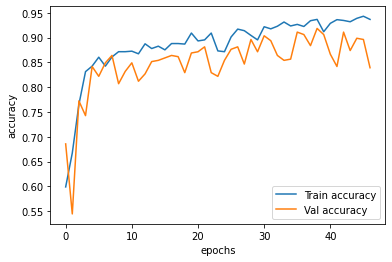

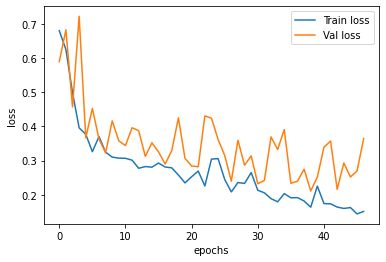

In [ ]:
def plot_metrics(history):
    validation_metrics = pd.DataFrame(history.history)
    print(validation_metrics)
    print()
    validation_metrics[["accuracy", "val_accuracy"]].plot(xlabel="epochs", ylabel="accuracy").legend(["Train accuracy", "Val accuracy"])
    validation_metrics[["loss", "val_loss"]].plot(xlabel="epochs", ylabel="loss").legend(["Train loss", "Val loss"])
    final_val_acc = validation_metrics.at[len(validation_metrics[["accuracy", "val_accuracy"]]) -1, "val_accuracy"]
    final_val_loss = validation_metrics.at[len(validation_metrics[["loss", "val_loss"]]) -1, "val_loss"]
    print("Final validation accuracy: {:.4f}".format(final_val_acc))
    print("Final validation loss:     {:.4f}".format(final_val_loss))
    print()

plot_metrics(history1)

In [ ]:
# Do final evaluation of the model using holdout test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

test_metrics = model1.evaluate(test_generator)
print("Final test accuracy: {:.4f}".format(test_metrics[1]))
print("Final test loss: {:.2f}".format(test_metrics[0]))

Found 406 images belonging to 2 classes.
13/13 [==============================] - 2s 154ms/step - loss: 0.2041 - accuracy: 0.9212
Final test accuracy: 0.9212
Final test loss: 0.20


In [ ]:
model1.save("1c-golfball_cathedral_improved.h5")